# Importing libraries

In [1]:
pip install nilearn

     ---------------------------------------- 9.6/9.6 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import nibabel as nib
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from nilearn.image import resample_img

# Datasets loading

In [4]:
image = nib.load('20220718130302_raw_t1_subject_01.nii')
image1 = nib.load('20220718130302_raw_t1_subject_02.nii')
imgage2 = nib.load('20220718130302_thickness_map_subject_01.nii')

In [22]:
data = image.get_data()
data1 = image1.get_data()
data2 = imgage2.get_data()

In [46]:
data.shape, data1.shape, data2.shape

((256, 256, 256), (256, 256, 256), (256, 256, 256))

In [7]:
pip install scikit-image==0.13.1

     ---------------------------------------- 26.1/26.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-image
Failed to build scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [586 lines of output]
  Partial import of skimage during the build process.
  running bdist_wheel
  running build
  running config_cc
  unifing config_cc, config, build_clib, build_ext, build commands --compiler options
  running config_fc
  unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
  running build_src
  build_src
  building extension "skimage._shared.geometry" sources
  building extension "skimage._shared.transform" sources
  building extension "skimage._shared.interpolation" sources
  building extension "skimage.draw._draw" sources
  building extension "skimage.feature.corner_cy" sources
  building extension "skimage.feature.censure_cy" sources
  building extension "skimage.feature.orb_cy" sources
  building extension "skimage.feature.brief_cy" sources
  building extension "skimage.feature._texture" sources
  building extensio

# Image visualization

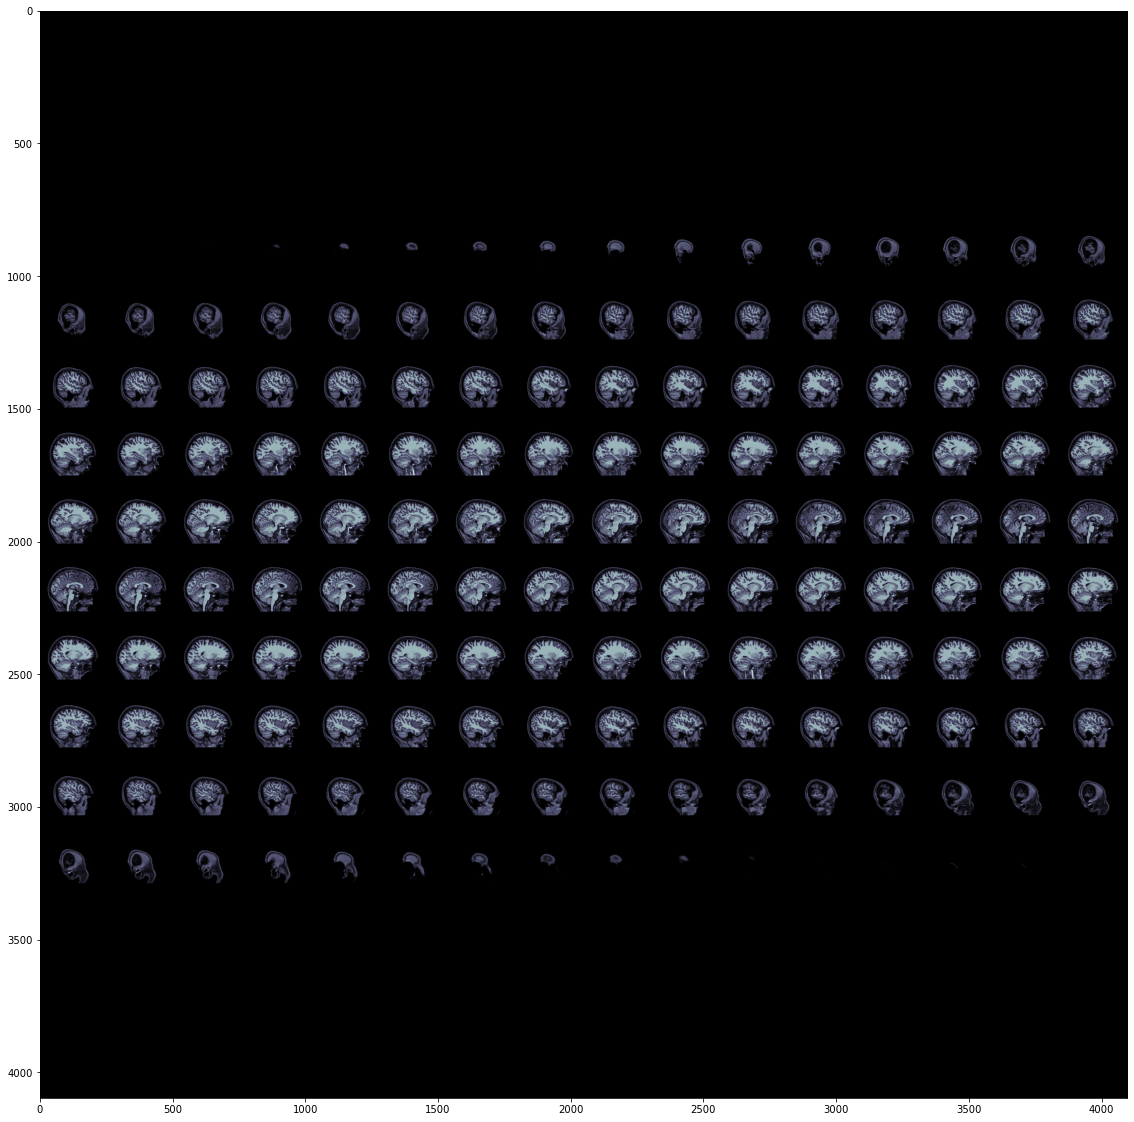

In [24]:
from skimage.util import montage
figure, axis1 = plt.subplots(1, 1, figsize = (20, 20))
axis1.imshow(montage(data), cmap ='bone')

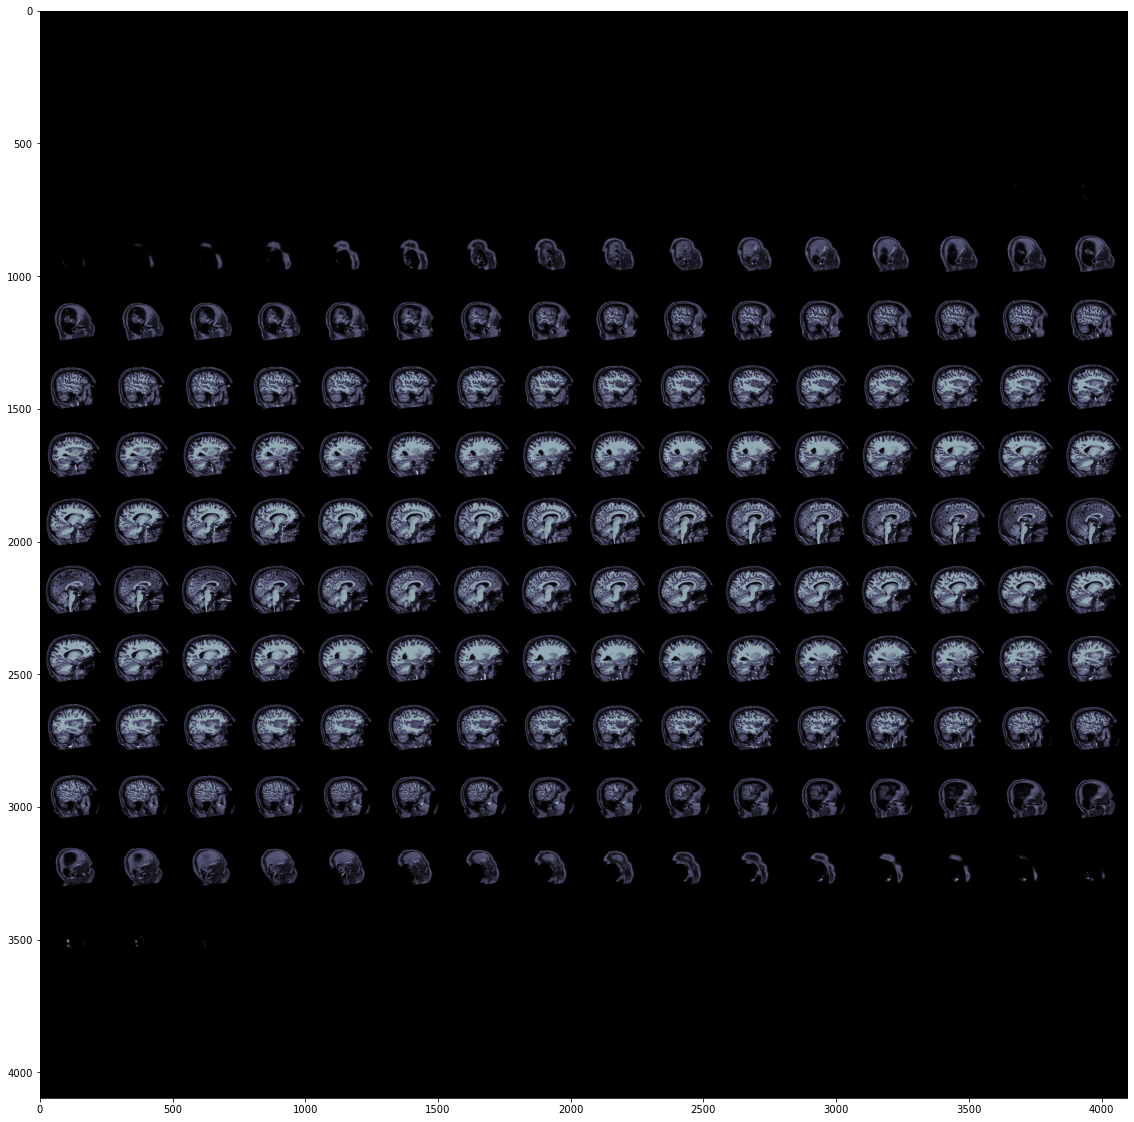

In [43]:
from skimage.util import montage
figure, axis1 = plt.subplots(1, 1, figsize = (20, 20))
axis1.imshow(montage(data1), cmap ='bone')

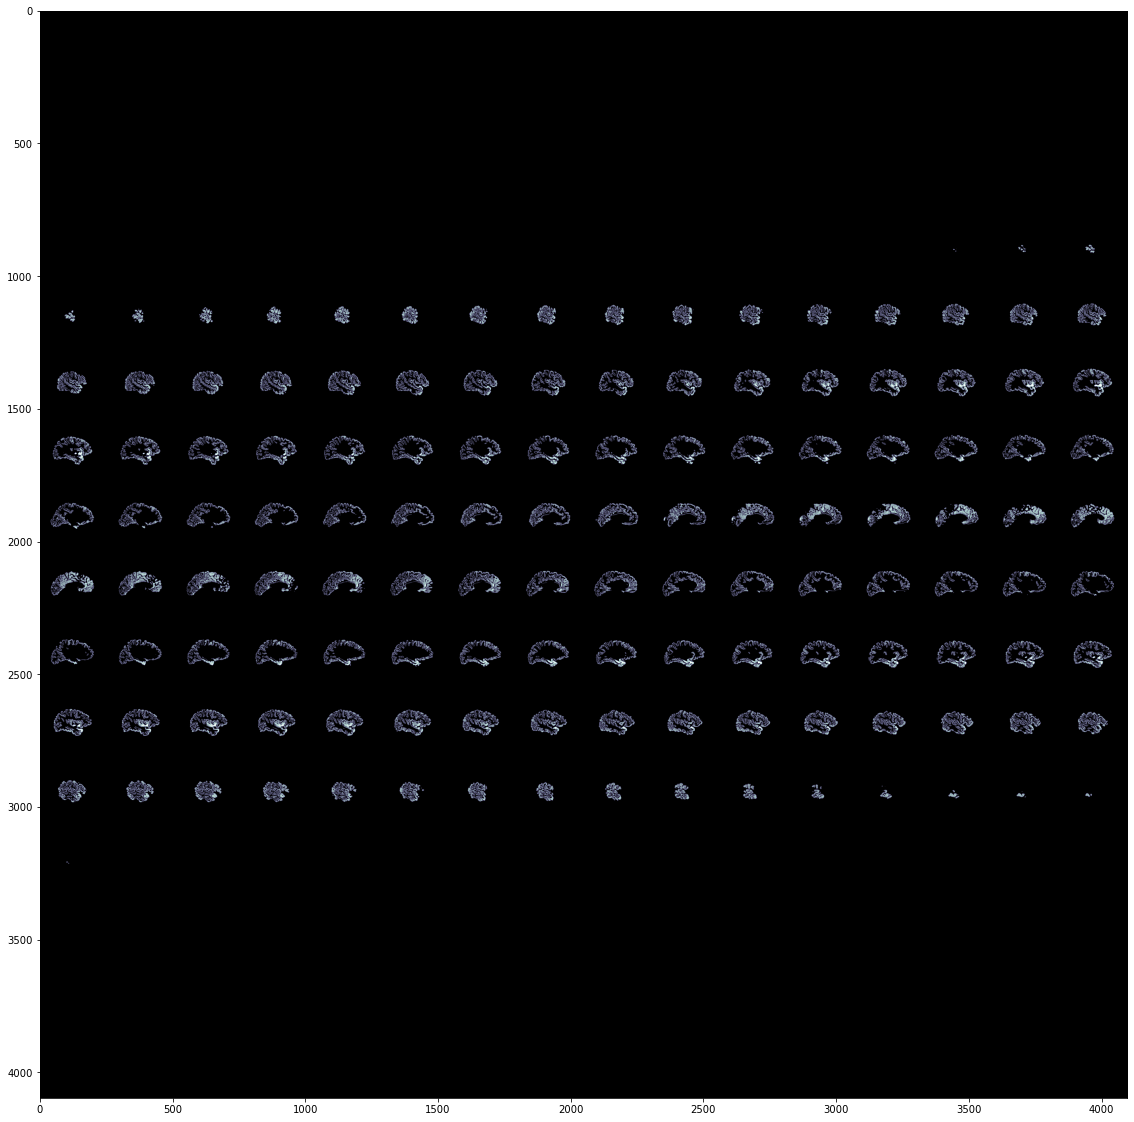

In [57]:
from skimage.util import montage
figure, axis1 = plt.subplots(1, 1, figsize = (20, 20))
axis1.imshow(montage(data2), cmap ='bone')

# Segmenting images

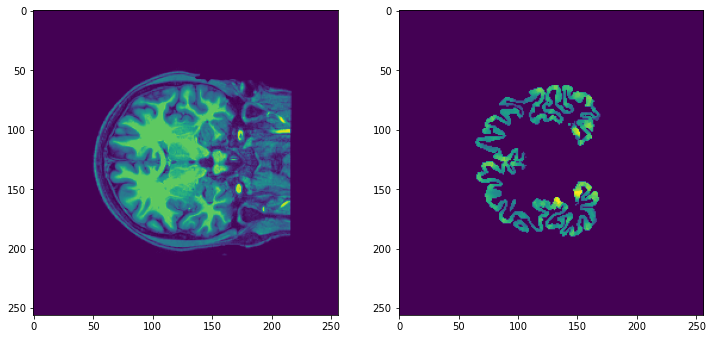

In [26]:
path=""
plt.figure(figsize=(12,6))
plt.subplot(121)
flair = nib.load('20220718130302_raw_t1_subject_01.nii')
flair_array = flair.get_fdata()
plt.imshow(flair_array[:,:,flair_array.shape[2]//2])
plt.subplot(122)
flair = nib.load(path+"20220718130302_thickness_map_subject_01.nii")
flair_array = flair.get_fdata()
plt.imshow(flair_array[:,:,flair_array.shape[2]//2])

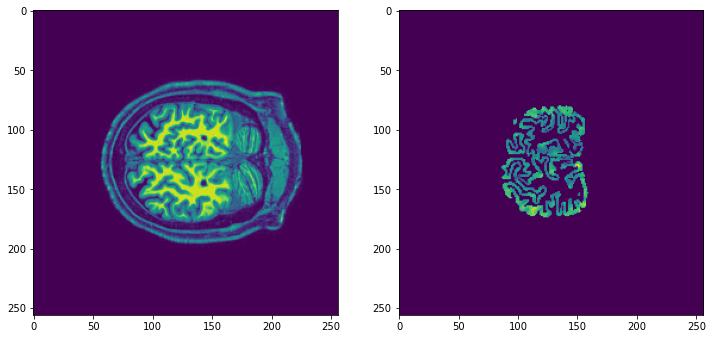

In [49]:
path=""
plt.figure(figsize=(12,6))
plt.subplot(121)
flair = nib.load('20220718130302_raw_t1_subject_02.nii')
flair_array = flair.get_fdata()
plt.imshow(flair_array[:,:,flair_array.shape[2]//4])
plt.subplot(122)
flair = nib.load(path+"20220718130302_thickness_map_subject_01.nii")
flair_array = flair.get_fdata()
plt.imshow(flair_array[:,:,flair_array.shape[2]//4])

In [27]:
type(image1)

nibabel.nifti1.Nifti1Image

In [28]:
data1.max()

166

In [51]:
data1.min()

0

In [52]:
data2.max()

5.0

In [54]:
top98thresh = np.percentile(data1, 92)

In [55]:
top98thresh

54.0

In [31]:
actual_result = data1.copy()
actual_result[actual_result > top98thresh] = top98thresh
actual_result.max()

54

In [50]:
actual_result = data2.copy()
actual_result[actual_result > top98thresh] = top98thresh
actual_result.max()

5.0

In [32]:
changed_img = nib.Nifti1Image(actual_result, image1.affine, image1.header)
type(changed_img)

nibabel.nifti1.Nifti1Image

In [33]:
image1.header.get_data_shape()

(256, 256, 256)

# Storing opuput file

In [34]:
file_empty = nib.Nifti1Header()
file_empty.get_data_shape()

(0,)

In [36]:
nib.save(changed_img, 'thickness_map_subject_05.nii')

In [37]:
test_result = nib.load('thickness_map_subject_04.nii')
test = test_result.get_data()

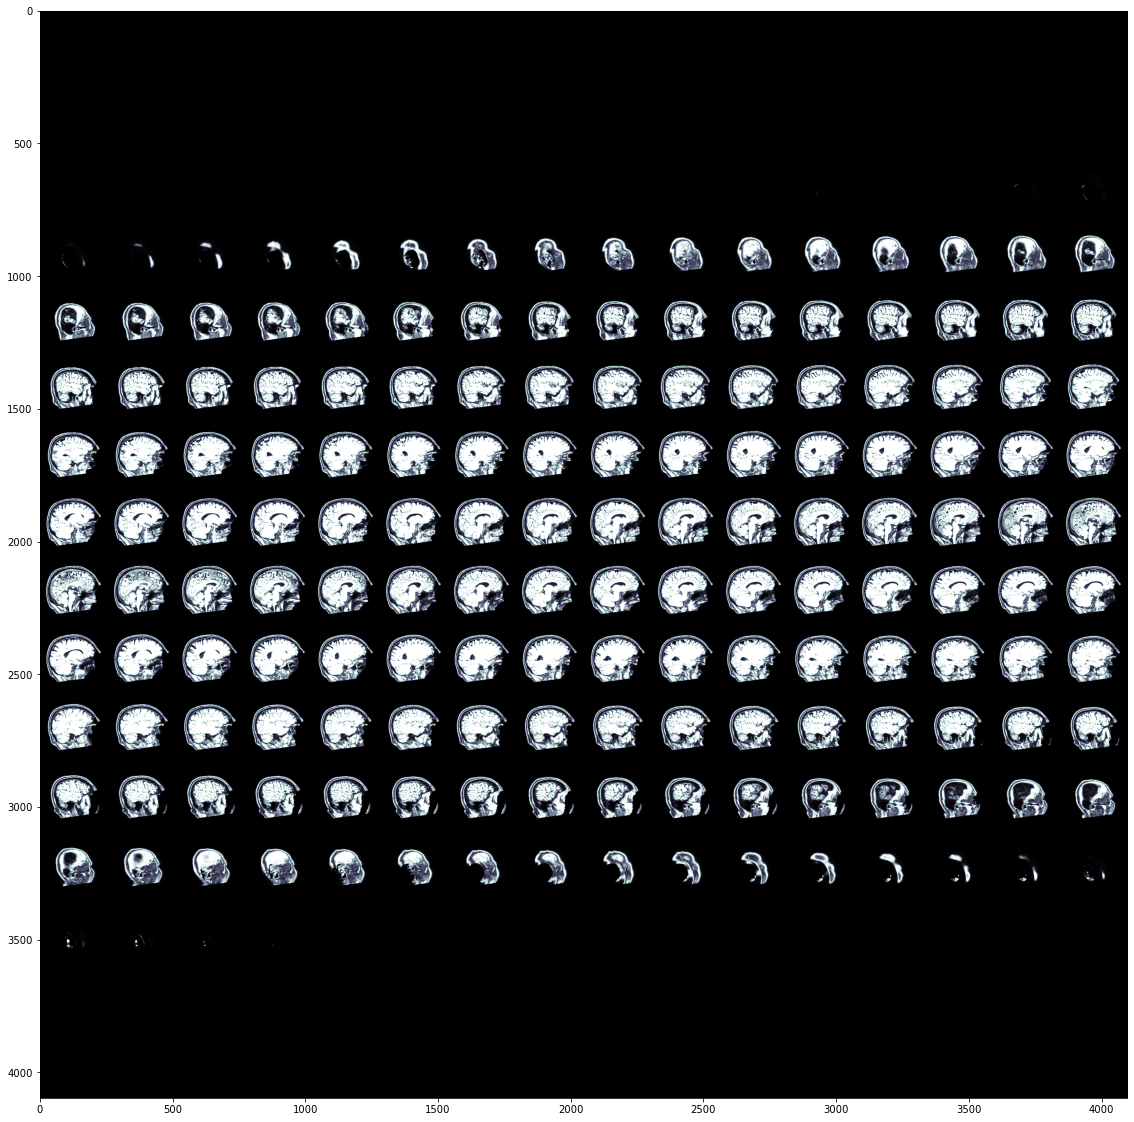

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage(test), cmap ='bone')

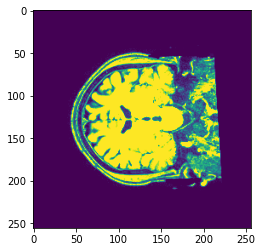

In [38]:
plt.imshow(test[:,:,test.shape[2]//2])